____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Elaborado por: Nicolas Aguirre__<br/>
____

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Para generar datos
from sklearn import datasets 
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
# Importamos silhouette_score
from sklearn.metrics import silhouette_score , rand_score

from helpers import report_clustering_kmeans, report_clustering_hierarchical

In [2]:
alumnos = pd.read_csv('alumnes.csv',index_col=0)

# Datasets

In [3]:
# A continuacion vamos a generar datos en donde ver 
# la respuesta de algunos algoritmos de clustering.

# Muestras
n_muestras = 750
random_state = 10

###########
# Datasets
###########

# 2D-Gaussian con misma std
gaussian = datasets.make_blobs(n_samples=n_muestras, random_state=8)

# 2D-Gaussian con diff. std
gaussian_std = datasets.make_blobs(n_samples=n_muestras,
                             cluster_std=[0.5, 1.5, 2.5,3.5], # 4 Clases
                             centers = [[10,15],[5,5],[-5,10],[-10,-10]], #Centros
                                   random_state=8)

# Gaussian "deformada"
X, y = datasets.make_blobs(n_samples=n_muestras,
                           random_state=10)
transformation = [[0.6, -5], [-0.4, 0.8]]
X_tf = np.dot(X, transformation)
gaussian_tf = (X_tf, y)

#Circulos  + ruido Gaussianos
circulos = datasets.make_circles(n_samples=n_muestras, factor=.5,
                                      noise=.05)
# Medios circulos intercalados
lunas = datasets.make_moons(n_samples=n_muestras, noise=.05)



# Juntamos todos los datos en una lista
dataset_list = [gaussian, gaussian_std, gaussian_tf,circulos, lunas]
dataset_name = ['Gaussian', 'Gaussian diff. std','Gaussian Transformed','Circulos','Lunas']

## Dataset's Plots

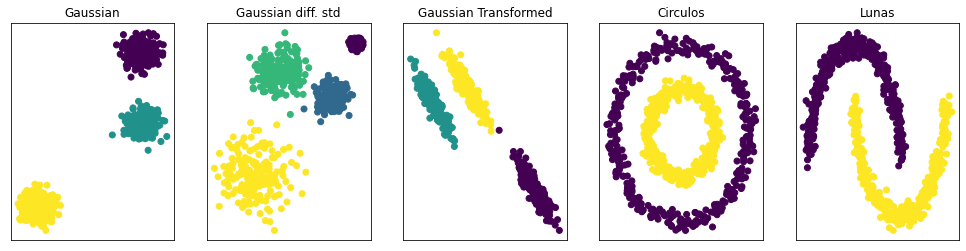

In [4]:
fig, axs = plt.subplots(figsize = (17,4),nrows=1,ncols=5)

for i, (dataset_i,name_i) in enumerate(zip(dataset_list,dataset_name)):
    x_i = dataset_i[0]
    y_i = dataset_i[1]
    axs[i].scatter(x_i[:,0],x_i[:,1],c=y_i)
    axs[i].set_title(name_i)
    axs[i].set_yticks([])
    axs[i].set_xticks([])    

# Clustering

## K-Means

**Crearemos una funcion a la que le pasaremos como información el dataset y su nombre.**

**Lo que queremos obtener de la funcion (return) son los scores:**

    * Silhouette
    
    * Rand Indx
    
**Ademas, plotearemos el ground truth, los clusters y los scores.**

**Una vez que tenemos definida esta funcion, solo tenemos que pasarle nuestros datos ...**

In [5]:
def report_clustering_kmeans(dataset,dataset_name):
    # Listas vacias donde guardar las metricas
    dist_cent = []
    sil_list = []
    rand_list = []
    
    # Separamos en X e Y
    x = dataset[0]
    y = dataset[1]
    
    # Plot para tener de referencia
    plt.figure(figsize=(5,5))
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.title(dataset_name)
    plt.show()
    
    # Plot donde iremos mostrando los resultados
    fig,axs = plt.subplots(2,4,figsize=(15,7))
    axs = axs.ravel()
    for i,k in enumerate(range(2, 10)):
        # Creamos el objeto de clustering
        cluster = KMeans(n_clusters=k).fit(x)
        centers_i = cluster.cluster_centers_ # Centroide de cada cluster
        labels_i = cluster.labels_ # Labels de cada muestra
        # Silhouttte Score
        sil_score_i = silhouette_score(x,labels_i)
        sil_list.append(sil_score_i)        
        # Rand_Index
        rand_index_i = rand_score(y,labels_i)
        rand_list.append(rand_index_i)
        dist_cent.append(cluster.inertia_)
        # Plots de los clusters
        axs[i].scatter(x[:,0],x[:,1],c=labels_i)
        axs[i].scatter(centers_i[:,0], centers_i[:,1], marker="x", color='r',s=150)
        axs[i].set_title('Clusters: ' + str(k))
        
    plt.show()
    # Plot de metricas
    fig, axs = plt.subplots(1,3,figsize=(15,5))    
    axs[0].plot(range(2, 10), dist_cent, marker='s');
    axs[0].set_xlabel('N° K')
    axs[0].set_ylabel('Sum of squared distances')
    # Silhoute plot
    axs[1].plot(range(2, 10), sil_list, marker='s');
    axs[1].set_xlabel('N° K')
    axs[1].set_ylabel('Silhouette')
    # Rand Index plot
    axs[2].plot(range(2, 10), rand_list, marker='s');
    axs[2].set_xlabel('N° K')
    axs[2].set_ylabel('Rand Index')    
    plt.show()
    # Devolvemos la lista con las metricas
    return (sil_list,rand_list)

### Gaussian

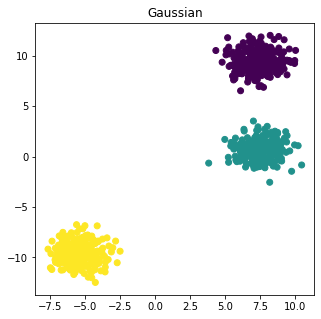

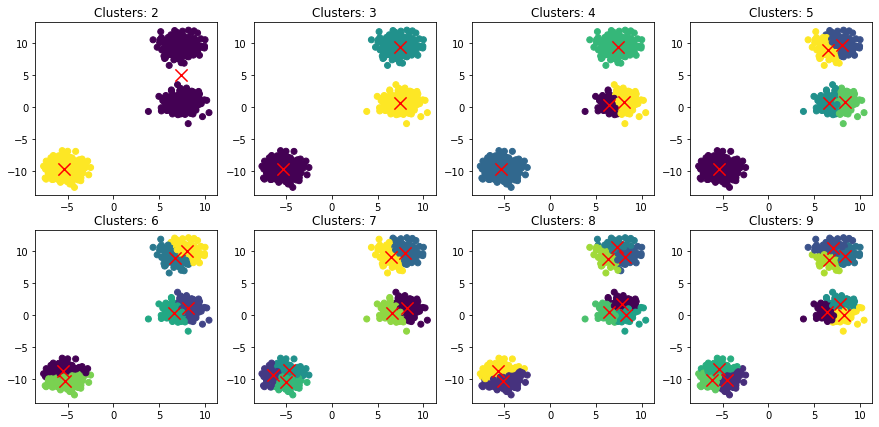

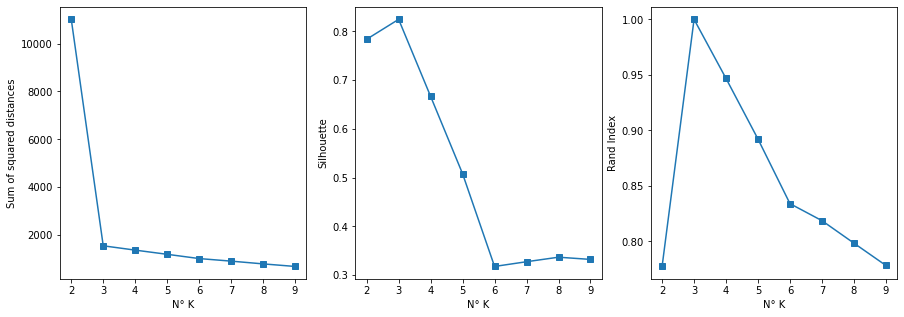

In [6]:
sill_score_gaussian, rand_index_gaussain = report_clustering_kmeans(gaussian,'Gaussian')

**Preguntas?**

### Gaussian Diff. $\sigma$

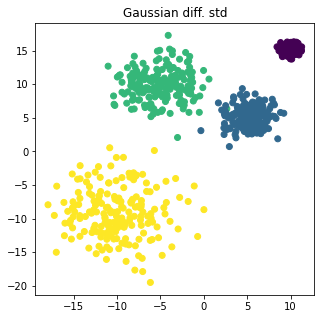

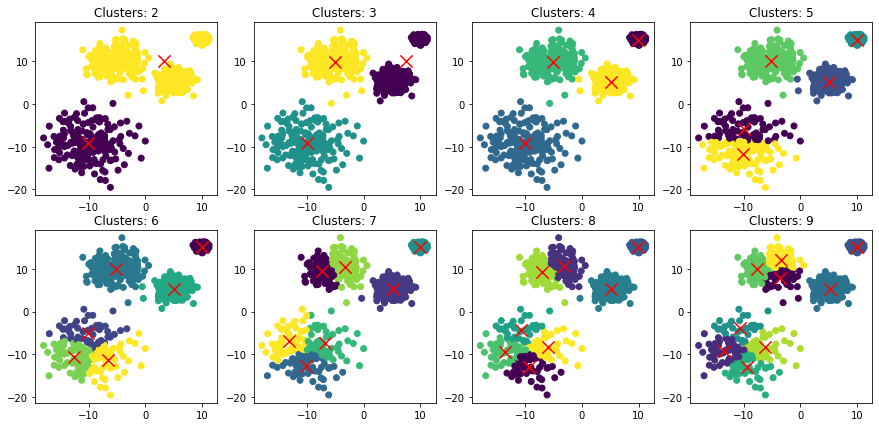

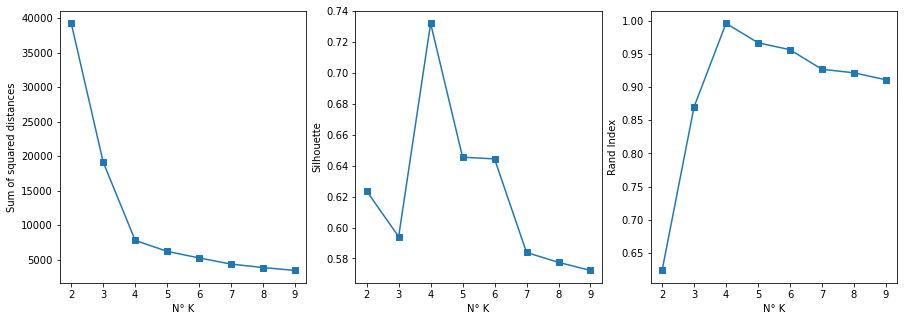

In [7]:
sill_score_gaussian_std, rand_index_gaussian_std = report_clustering_kmeans(gaussian_std,'Gaussian diff. std')

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

**Logramos una clusterizacion perfecta?**

### Gaussian Transformed

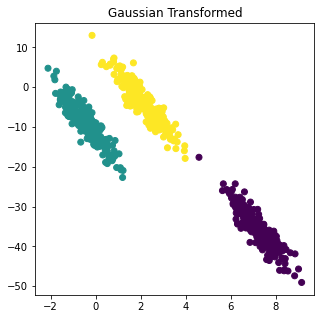

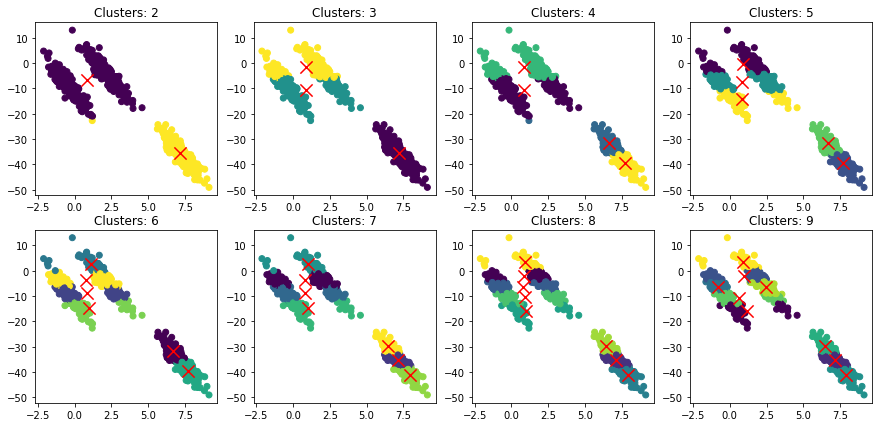

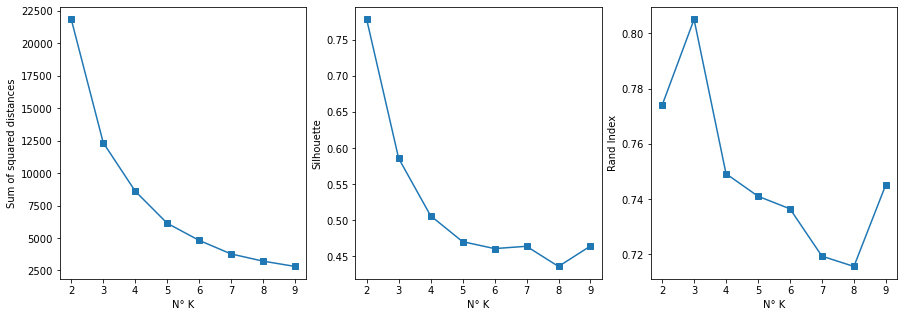

In [9]:
sill_score_gaussian_tf, rand_index_gaussian_tf = report_clustering_kmeans(gaussian_tf,'Gaussian Transformed')

**Cual K eligirian ustedes?**

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

### Circulos

**Como creen que sera el clustering para este caso?**

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

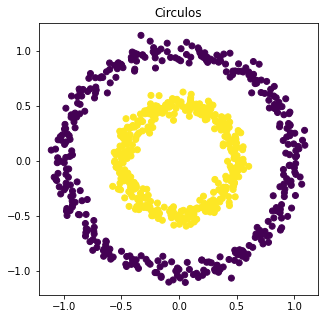

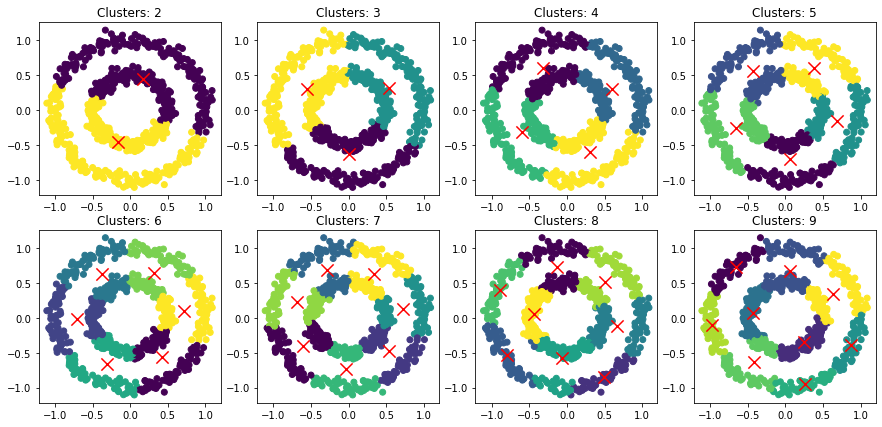

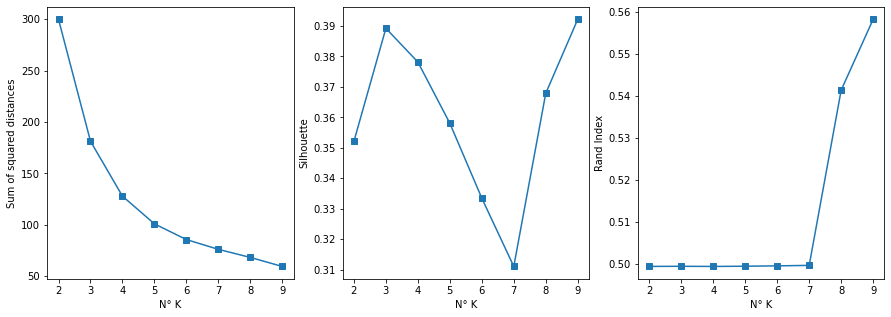

In [12]:
sill_score_circulos, rand_index_circulos = report_clustering_kmeans(circulos,'Circulos')

**Repitamos nuevamente el clustering y comparemoslo con el previamente realizado ...**

1. **Da igual?**

2. **Si/No. Porque?**

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

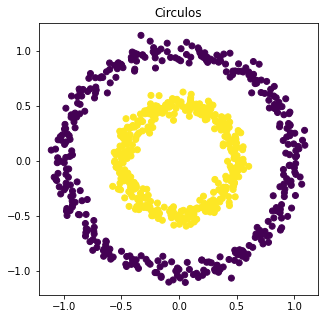

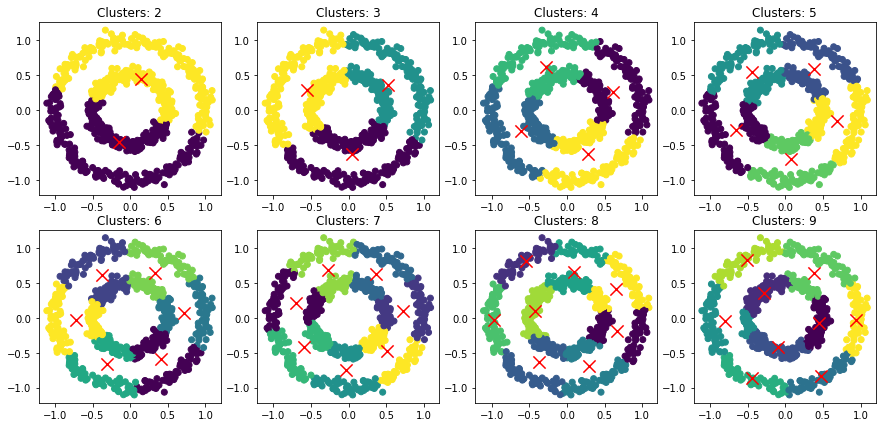

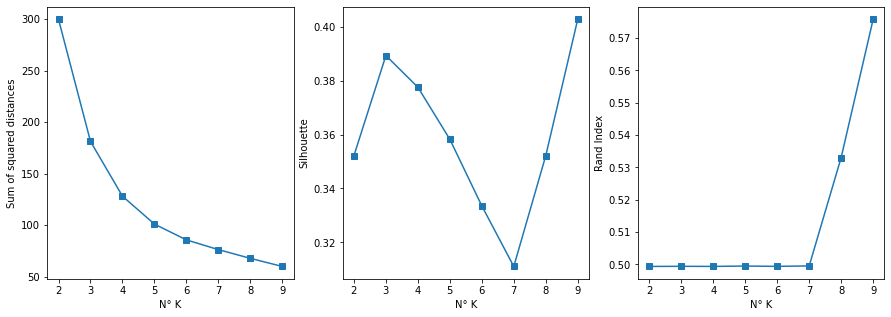

In [15]:
sill_score_circulos, rand_index_circulos = report_clustering_kmeans(circulos,'Circulos')

### Lunas

**Por ultimo ... veamos que sucede con esta estructura de datos ...**

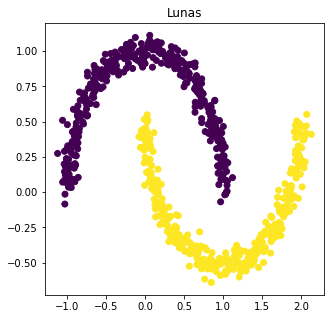

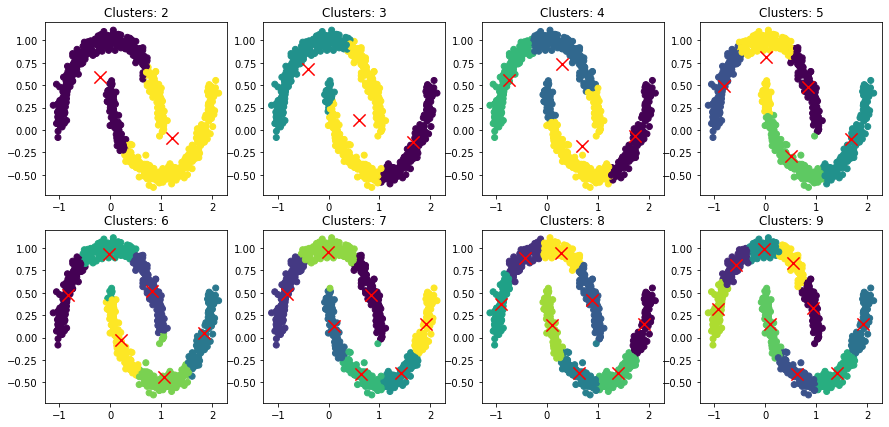

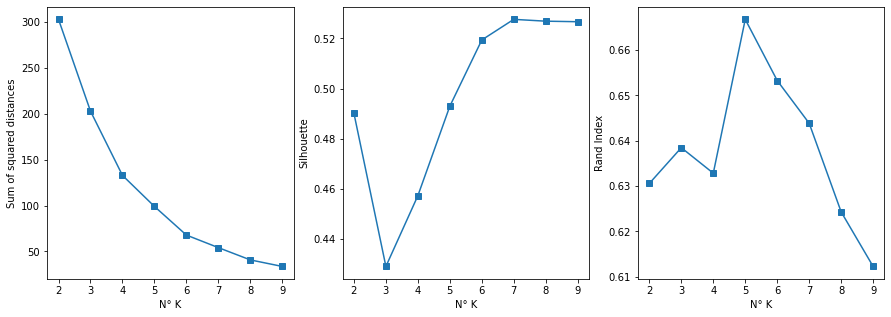

In [16]:
sill_score_lunas, rand_index_lunas = report_clustering_kmeans(lunas,'Lunas')

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

**Que conclusiones podemos sacar sobre K-Means?**

**Preguntas?**

![Meme](https://img-9gag-fun.9cache.com/photo/a5Rowgg_700bwp.webp)

## Hierarchical

**Veamos ahora como se aplica Hierarchical Clustering**

In [19]:
# Definimos el linkage
x = gaussian[0]
Z = linkage(x, 'ward')

In [20]:
# Threshold de distancia --> Definido por el usuario !
dist_cluster = 100

**Para visualizar $\rightarrow$ Dedogram**

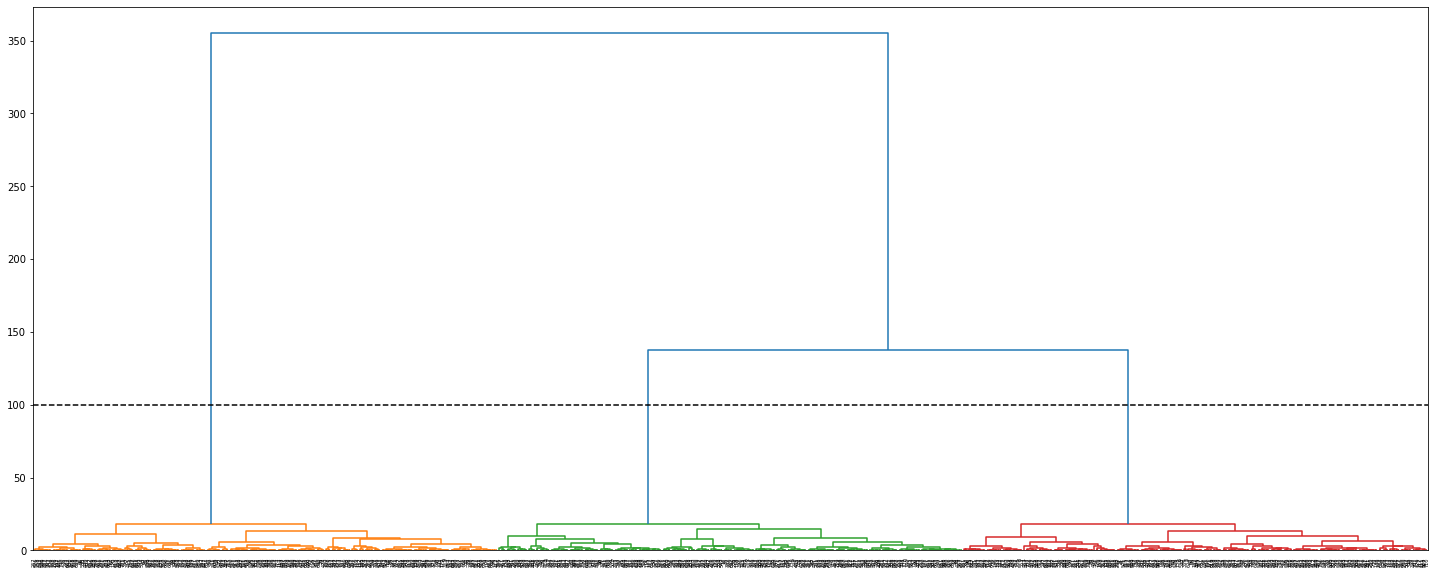

In [21]:
plt.figure(figsize=(25, 10))
dendrogram(Z,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

**De la misma manera que definimos una funcion para K-Means, vamos a hacer lo mismo con  Hierarchical Clustering**

In [22]:
def report_clustering_hierarchical(dataset,dataset_name,dist_clusters,affinity_measure,linkage_name):
    """
    affinity_measure: Metrica de la distancia entre puntos

        # "cosine": Similaridad angular

        # "euclidean": L2

        # "cityblock"(Manhattan): L1


    linkage_name : Metodo para medir distancias entre clusters

        # 'single': 
        Utiliza la distancia de los dos puntoss más cercanos entre los clústeres para representar la distancia interclúster.

        # 'complete':
        Utiliza los dos puntos más distantes. Favorece la creacion de clusters esfericos.

        # 'average':
        Utiliza la distancia media. Menos afectado por outliers

        # 'ward': 
        Unimos clusters de manera tal que la suma de los errores cuadrados al centroide sea la menor.

    """
    # Listas vacias donde guardar las metricas/scores
    sil_list = []
    rand_list = []
    # Separamos en X e Y
    x = dataset[0]
    y = dataset[1]
    
    # Plot para tener de referencia
    plt.figure(figsize=(5,5))
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.title(dataset_name)
    plt.show()
    # Plot donde iremos mostrando los resultados
    fig,axs = plt.subplots(2,4,figsize=(15,7))
    axs = axs.ravel()
    for i , dist_i in enumerate(dist_clusters):
        
        # Creamos el objeto para clustering con sus parametros
        cluster = AgglomerativeClustering(n_clusters=None,
                                          distance_threshold = dist_i,
                                          affinity= affinity_measure,
                                          linkage=linkage_name)

        cluster.fit_predict(x)
        # Obtenemos los labels
        labels_i = cluster.labels_
        n_clusters = len(np.unique(labels_i))
        
        # Para evitar errores si la cantidad de clusters es 1 ...
        if not 1 < n_clusters:
            sil_list.append(0)
            rand_list.append(0) 
            continue
            
        # Silhouette
        sil_score = silhouette_score(x,labels_i)
        sil_list.append(sil_score)
        
        # Rand_Index
        rand_index_i = rand_score(y,labels_i)
        rand_list.append(rand_index_i)   
        
        # Plots de los clusters
        axs[i].scatter(x[:,0],x[:,1],c=labels_i)
        axs[i].set_title('Distance: ' + str(dist_i) + ' - N° Clusters: ' + str(n_clusters))

    plt.show()
    
    # Plot de metricas
    fig, axs = plt.subplots(1,3,figsize=(15,5))    
    axs[0].plot(dist_clusters, sil_list, marker='s');
    axs[0].set_xlabel('Threshold distances')
    axs[0].set_ylabel('Silhouette')
    # Ploteamos el dendomgram del mejor silhouette_score
    best_sil = np.argmax(sil_list)
    best_dist = dist_clusters[best_sil]
    Z = linkage(x, linkage_name)
    dendrogram(Z,color_threshold=best_dist,ax=axs[1])
    axs[1].axhline(c='k',linestyle='--', y=best_dist)
    axs[1].set_title('Dendogram')
    axs[2].plot(dist_clusters, rand_list, marker='s');
    axs[2].set_xlabel('Threshold distances')
    axs[2].set_ylabel('Rand Index')     
    plt.show()
    return (sil_list,rand_list)

**Linkage**

<img src="files/linkage_diagram.svg" width="500" height="300">

### Gaussian

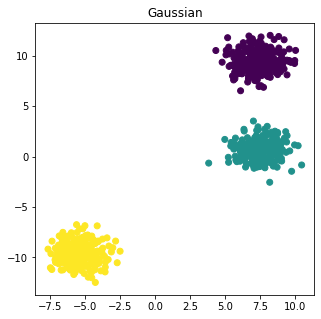

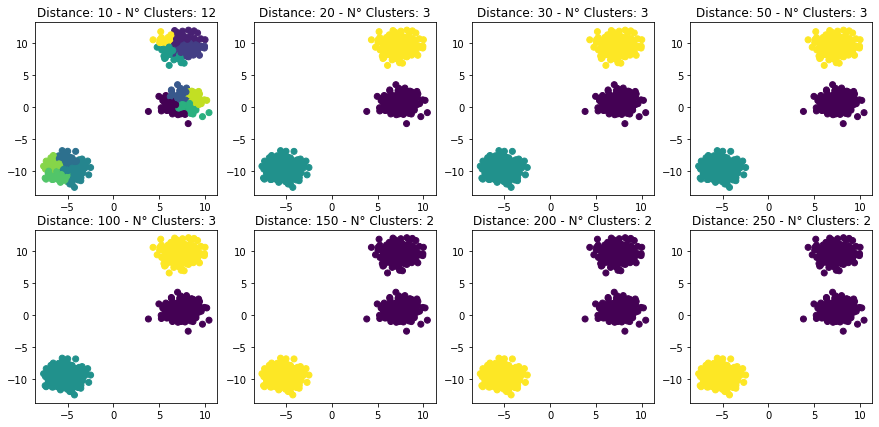

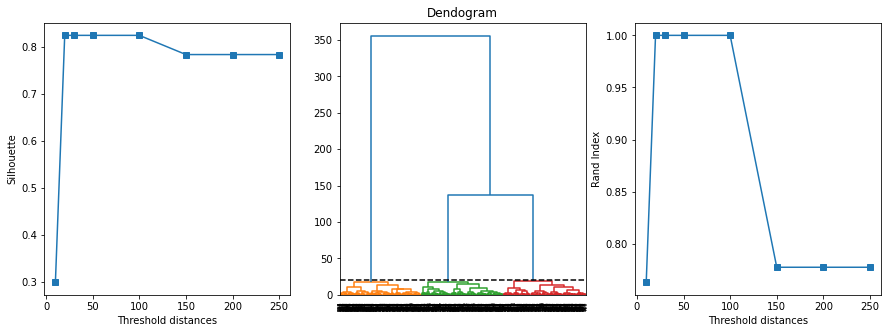

In [23]:
# Listas de threshold de ditancia para comparar ...
dist_trhs = [10,20,30,50,100,150,200,250]

# Metrica de distancia
affinity_measure = 'euclidean'
# Metodo de union de clusters
linkage_method = 'ward'

# Llamamos a la funcion previamente creada ...
sil_hier_gauss,rand_hier_gauss = report_clustering_hierarchical(gaussian,'Gaussian', 
                                                dist_trhs,affinity_measure, linkage_method)

### Gaussian Diff. $\sigma$

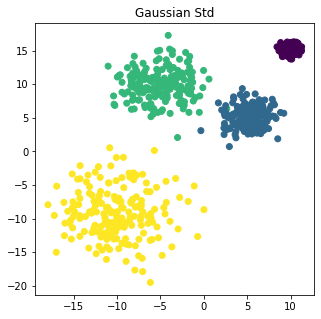

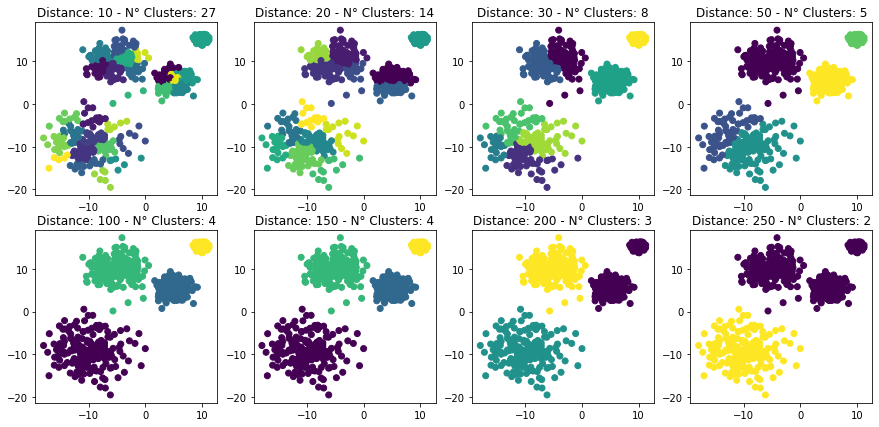

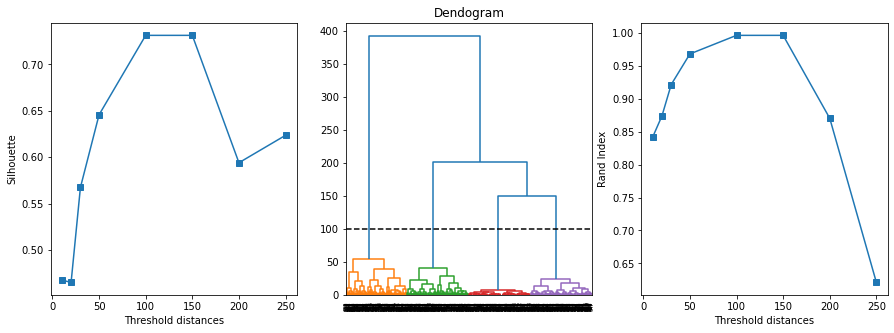

In [24]:
dist_trhs = [10,20,30,50,100,150,200,250]
affinity_measure = 'euclidean'
linkage_method = 'ward'
sil_hier_gaussian_std,rand_hier_gaussian_std = report_clustering_hierarchical(gaussian_std,'Gaussian Std',
                                                        dist_trhs,affinity_measure, linkage_method)

### Gaussian Transformed

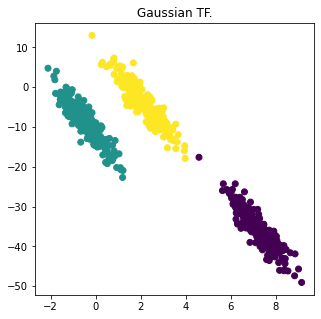

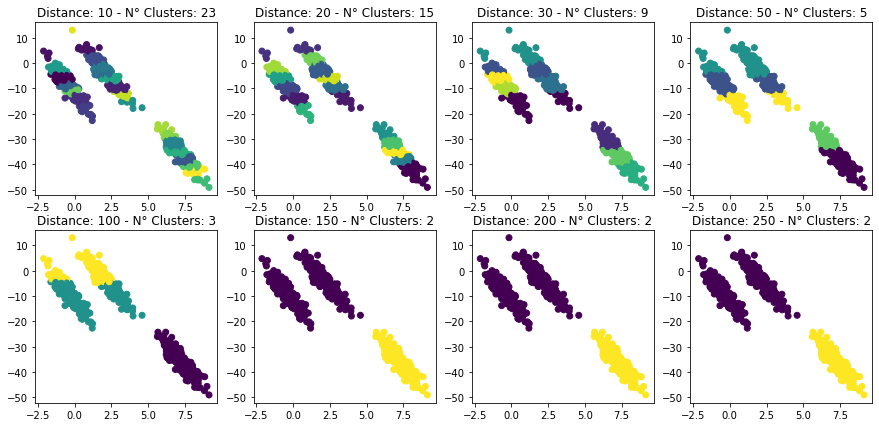

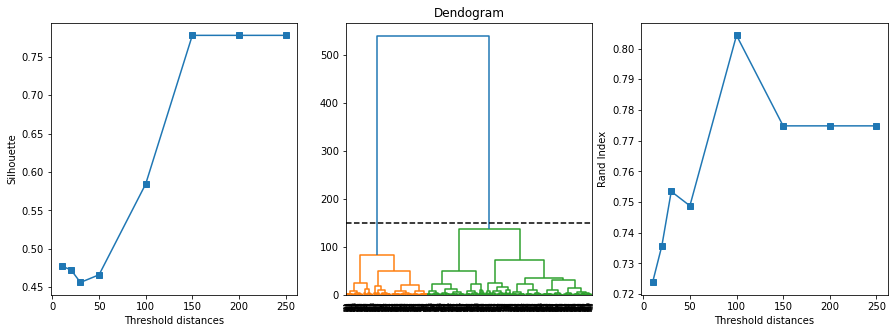

In [25]:
dist_trhs = [10,20,30,50,100,150,200,250]
affinity_measure = 'euclidean'
linkage_method = 'ward'
sil_hier_gaussian_tf, rand_hier_gaussian_tf = report_clustering_hierarchical(gaussian_tf,'Gaussian TF.',
                                                       dist_trhs,affinity_measure, linkage_method)

### Circulos

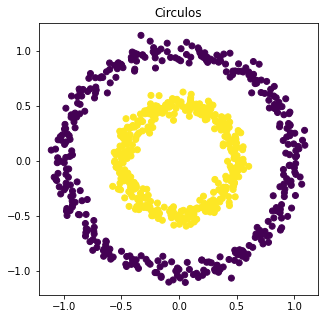

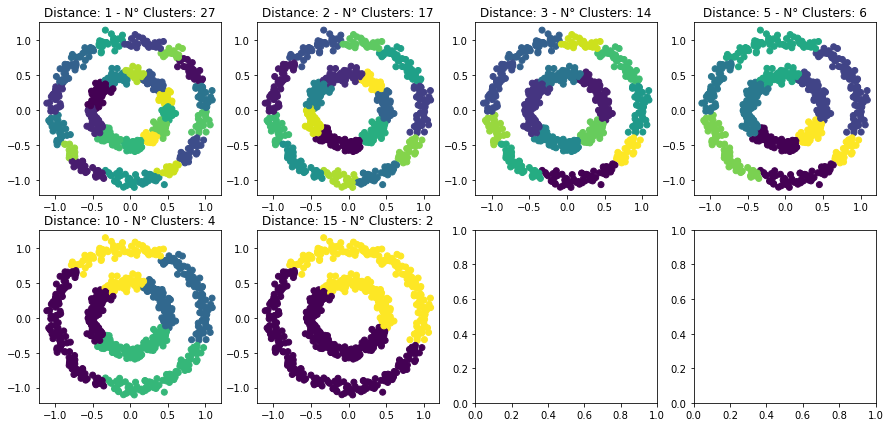

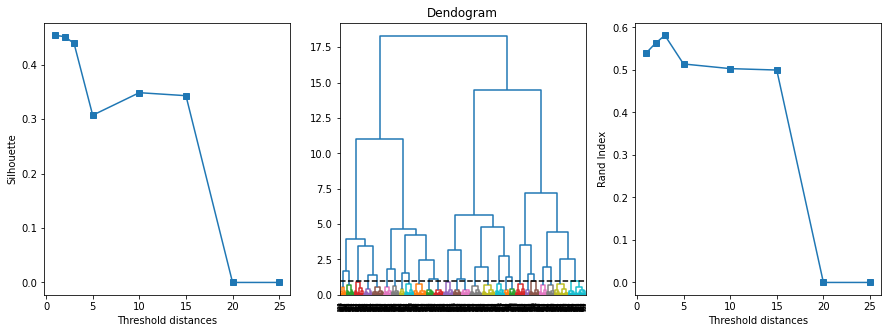

In [26]:
dist_trhs = [1,2,3,5,10,15,20,25]
affinity_measure = 'euclidean'
linkage_method = 'ward'
sil_hier_circulos, rand_hier_circulos = report_clustering_hierarchical(circulos,'Circulos',
                                                    dist_trhs,affinity_measure, linkage_method)

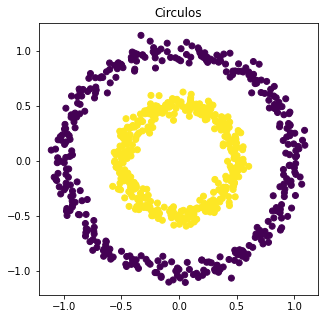

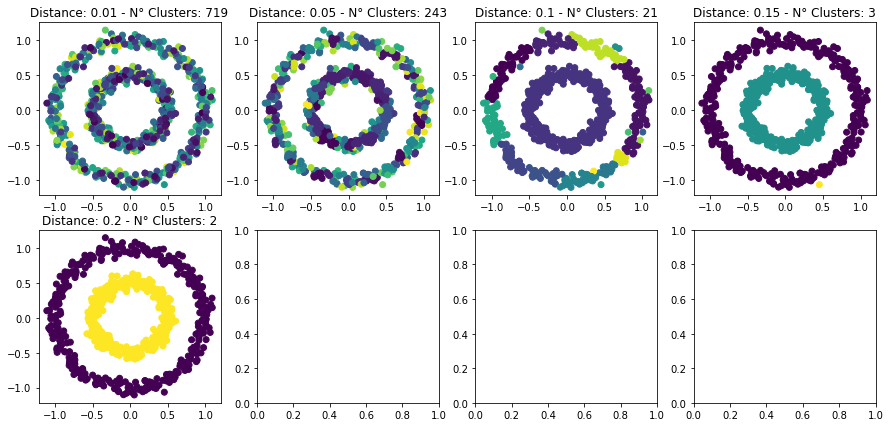

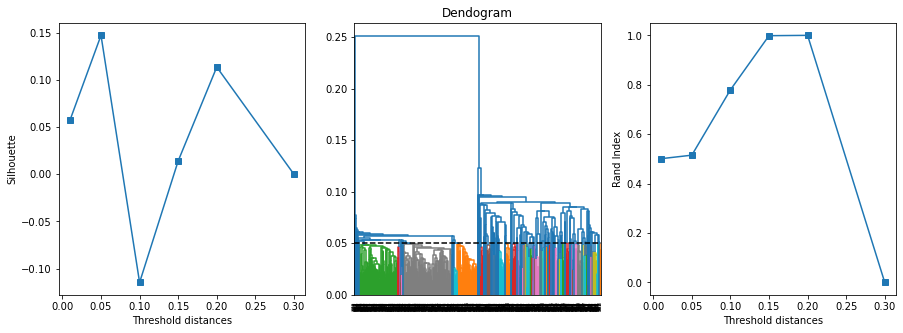

In [27]:
dist_trhs = [0.01,0.05,0.1,0.15,0.2,0.3]
affinity_measure = 'cityblock'
linkage_method = 'single'
sil_hier_circulos, rand_hier_circulos = report_clustering_hierarchical(circulos,'Circulos',
                                                    dist_trhs,affinity_measure, linkage_method)

### Lunas

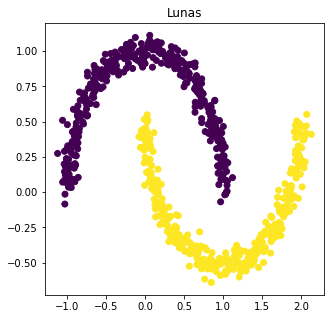

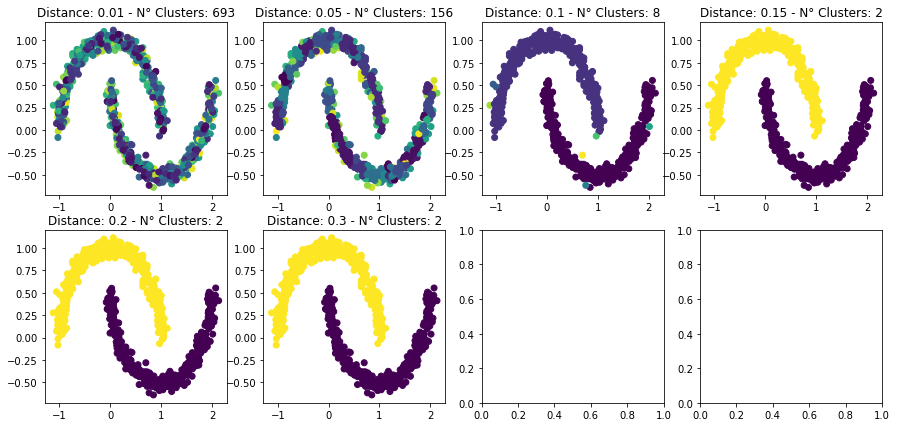

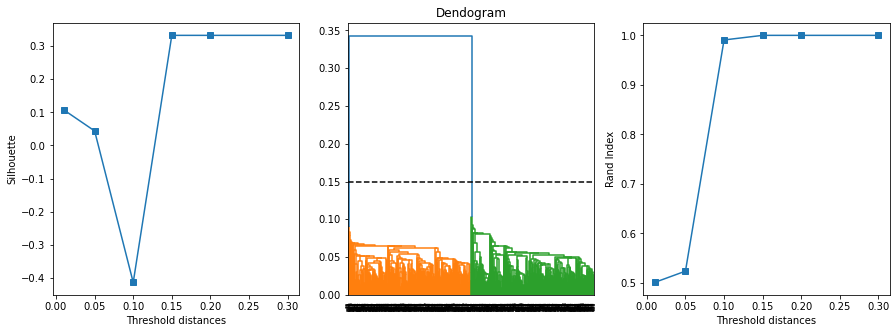

In [28]:
dist_trhs = [0.01,0.05,0.1,0.15,0.2,0.3]
affinity_measure = 'cityblock'
linkage_method = 'single'

sil_hier_lunas, rand_hier_lunas = report_clustering_hierarchical(lunas,'Lunas',
                                                 dist_trhs, affinity_measure, linkage_method)

**Pregunta:**

**Si repitiesemos los experimientos ... variarian los clusterings?**

In [ ]:
alumnos.loc[np.random.randint(len(alumnos)),'Alumno']

# Librerias propias en Python

**Veamos como importar nuestro propio paquete de librerias en python**

1. Creamos un archivo con la extension *helpers.py*


2. Importamos las librerias que vamos a utilizar como encabezado


3. Definimos nuestras funciones.


4. Guardamos el archivo


5. Lo importamos para utilizar


**MUY FACIL, PRACTICO Y PROLIJO !**